# CHURN RATE PREDICTION 
-by Shivam Sharma

In [ ]:
# Import Necesaary Libraries and Model Classes
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Let us import the dataset and see the different type of columns in it.

In [ ]:
# importing dataset into environment
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# DATA VISUALIZATION

---



---



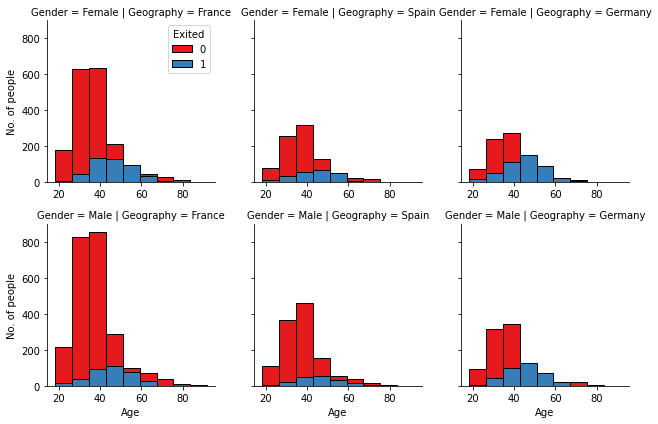

In [ ]:
# 0 implies False value => That is those who have not exited.
bins = np.linspace(dataset.Age.min(), dataset.Age.max(),10)
g = sns.FacetGrid(dataset, col="Geography", row="Gender", hue="Exited", palette="Set1",sharex=False, legend_out=False)
g.map(plt.hist, 'Age', bins=bins, ec="k")
g.set_ylabels("No. of people")
g.add_legend()
plt.show()

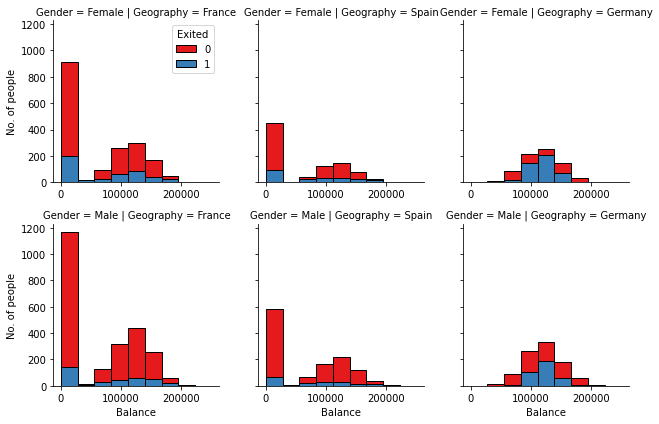

In [ ]:
bins = np.linspace(dataset.Balance.min(), dataset.Balance.max(),10)
g = sns.FacetGrid(dataset, col="Geography", row="Gender", hue="Exited", palette="Set1",sharex=False, legend_out=False)
g.map(plt.hist, 'Balance', bins=bins, ec="k")
g.set_ylabels("No. of people")
g.add_legend()
plt.show()

**Brief description about above plot:**
In the above plots we have used the FaceGrid Function to plot the relation between -

**Plot 1:** Age and No. of people who have either exited*(in red)* and those who have not*(in blue)*.

**Plot 2:** Balance and No. of people who have either exited*(in red)* and those who have not*(in blue)*.

These plots are separated on the basis of Gender and Geography.

> **From the above plots it is evident that**: overall people exited are in age group of 40-60 years.




---



---




# Conversion of categorical data to numerical data
Geography and gender are categorical type data.
 Geography contains 3 different type: *'France', 'Germnay', 'Spain'.*
 Gender has two types : 'Male' & 'Female'.

Let us convert them into Numerical data via mapping it to a dictionary.

In [ ]:
dataset['Geography'] = dataset['Geography'].map({'France':1,'Germany':2,'Spain':3}) 
dataset['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)
#Both method can be used to execute the action.
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,3,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,3,1,43,2,125510.82,1,1,1,79084.10,0


# Feature selection/extraction

---



---



In [ ]:
X = dataset[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','EstimatedSalary']]
X[0:6]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary
0,619,1,1,42,2,0.00,1,1,101348.88
1,608,3,1,41,1,83807.86,1,0,112542.58
2,502,1,1,42,8,159660.80,3,1,113931.57
3,699,1,1,39,1,0.00,2,0,93826.63
4,850,3,1,43,2,125510.82,1,1,79084.10
5,645,3,0,44,8,113755.78,2,1,149756.71


In [ ]:
Y = dataset['Exited'].values
Y[0:5]


array([1, 0, 1, 0, 0])

# [Pre-processing](https://en.wikipedia.org/wiki/Data_pre-processing)

---
 
> The data is normalised i.e. centered and scaled, the mean and standard deviation is calculated and then the values are standarized according to them. It helps in ranging data such that one value doesnot lead to malfunction of the classifier such as KNN or SVM.



In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]


array([[-0.32622142, -0.90188624,  1.09598752,  0.29351742, -1.04175968,
        -1.22584767, -0.91158349,  0.64609167,  0.02188649],
       [-0.44003595,  1.51506738,  1.09598752,  0.19816383, -1.38753759,
         0.11735002, -0.91158349, -1.54776799,  0.21653375],
       [-1.53679418, -0.90188624,  1.09598752,  0.29351742,  1.03290776,
         1.33305335,  2.52705662,  0.64609167,  0.2406869 ],
       [ 0.50152063, -0.90188624,  1.09598752,  0.00745665, -1.38753759,
        -1.22584767,  0.80773656, -1.54776799, -0.10891792],
       [ 2.06388377,  1.51506738,  1.09598752,  0.38887101, -1.04175968,
         0.7857279 , -0.91158349,  0.64609167, -0.36527578]])

# Data test train split


---

One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

**Out of Sample Accuracy**: is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 4) # Test size gives the percentage of data which will be kept for testing.

print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape) # Out of sample data.

Train set: (8000, 9) (8000,)
Test set: (2000, 9) (2000,)


# Classification 


---



---



In [ ]:
lst_clf_jacc = []
lst_clf_name = [] # To store the best accuracy and the name of the classifier respectively

## Logistic Regression
---



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_similarity_score
solver_dict = {0:"newton-cg", 1:"lbfgs", 2:"sag", 3:"saga",4:"liblinear"}
for i in range(0,5):
  lgr = LogisticRegression(C=0.01,solver=solver_dict[i])
  Model_Lgr = lgr.fit(X_train,Y_train) # This fits the value and creates a model ready to predict.
  Y_hat = Model_Lgr.predict(X_test)
  print("Jaccard Accuracy for ",solver_dict[i],"is",jaccard_similarity_score(Y_test, Y_hat))

Jaccard Accuracy for  newton-cg is 0.791
Jaccard Accuracy for  lbfgs is 0.791
Jaccard Accuracy for  sag is 0.791
Jaccard Accuracy for  saga is 0.791
Jaccard Accuracy for  liblinear is 0.7895


In [ ]:
lst_clf_jacc.append(0.791)
lst_clf_name.append('Logistic Regression')

The accuracy is constant for all solver types, but in case of liblinear the accuracy decreaeses.

In [ ]:
# Thus Evaluating the Classification report of LOgistic Regression model using 'newton-cg'
from sklearn.metrics import classification_report, accuracy_score
CLF = LogisticRegression(C=0.01,solver="newton-cg")
model_lgr = CLF.fit(X_train,Y_train)
print (classification_report(Y_test,model_lgr.predict(X_test)))
print("In sample/Train set Accuracy: ", accuracy_score(Y_train, model_lgr.predict(X_train)))
print("Out of sample accuracy :",accuracy_score(Y_test,model_lgr.predict(X_test)))


              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1604
           1       0.35      0.07      0.11       396

    accuracy                           0.79      2000
   macro avg       0.58      0.52      0.50      2000
weighted avg       0.72      0.79      0.73      2000

In sample/Train set Accuracy:  0.786
Out of sample accuracy : 79.10000000000001


#  Random Forest 
---



In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
clf= RFC(n_estimators = 500,min_samples_leaf = 50,random_state = 4) # parameters are set to get the best accuracy
model_RF = clf.fit(X_train,Y_train)

In [ ]:
Y_hat = model_RF.predict(X_test)
print("In sample/Train set Accuracy: ", accuracy_score(Y_train, model_RF.predict(X_train)))
print("Out of sample/Test set Accuracy: ",accuracy_score(Y_test, Y_hat))

print("Jaccard Accuracy is",jaccard_similarity_score(Y_test, Y_hat))

In sample/Train set Accuracy:  0.855375
Out of sample/Test set Accuracy:  0.863
Jaccard Accuracy is 0.863


In [ ]:
lst_clf_jacc.append(0.863)
lst_clf_name.append('Random Forest')

Visualization of the Random Forest Tree structure is not feasible as we are more concerned with churn classification. In its context the accuracyis found to be : 0.863

#  K nearest neighbors  

---





In [ ]:
from sklearn.neighbors import KNeighborsClassifier as kn
# Lets start with k = 4 
k = 4
clf = kn(n_neighbors = k )
model_knn = clf.fit(X_train,Y_train)

In [ ]:
Y_hat = model_knn.predict(X_test)
Y_hat[0:5]
print("In sample/Train set Accuracy: ", accuracy_score(Y_train, model_knn.predict(X_train)))
print("Out of sample/Test set Accuracy: ",accuracy_score(Y_test, Y_hat))

In sample/ Train set Accuracy:  0.87075
Out of sample/ Test set Accuracy:  0.8365


Well we have predicted the class labels on the test set and got the accuracy to be : 0.83. But what about other values of k There may be a value of k for which we can get better accuracy.

In [ ]:
def k_model_acc(K):
    mean_acc = np.zeros((K)) # Creates an null array of shape : (10,)  
    mean_jacc = np.zeros((K))
    
    for n in range(1,K+1):
        #Train Model and Predict  
        Model = kn(n_neighbors = n).fit(X_train,Y_train)
        y_hat=Model.predict(X_test)
        mean_acc[n-1] = accuracy_score(Y_test, y_hat)
        mean_jacc[n-1] = jaccard_similarity_score(Y_test, y_hat)
        print("Jaccard Accuracy for k = ",n,"is",jaccard_similarity_score(Y_test, y_hat))
    return mean_acc,mean_jacc

def acc_show(K,mean_acc):
    plt.plot(range(1,K+1),mean_acc,'r')
    plt.legend(('Accuracy '))
    plt.ylabel('Accuracy ')
    plt.xlabel('Number of Neighbours (K)')
    plt.show()

def jacc_show(K,mean_jacc):
    plt.plot(range(1,K+1),mean_jacc,'g')
    plt.legend(('Accuracy '))
    plt.ylabel('Accuracy ')
    plt.xlabel('Number of Neighbours (K)')
    plt.show()

Enter the max value of k = 12
Jaccard Accuracy for k =  1 is 0.8005
Jaccard Accuracy for k =  2 is 0.8275
Jaccard Accuracy for k =  3 is 0.826
Jaccard Accuracy for k =  4 is 0.8365
Jaccard Accuracy for k =  5 is 0.8335
Jaccard Accuracy for k =  6 is 0.8345
Jaccard Accuracy for k =  7 is 0.84
Jaccard Accuracy for k =  8 is 0.841
Jaccard Accuracy for k =  9 is 0.842
Jaccard Accuracy for k =  10 is 0.8395
Jaccard Accuracy for k =  11 is 0.845
Jaccard Accuracy for k =  12 is 0.8445


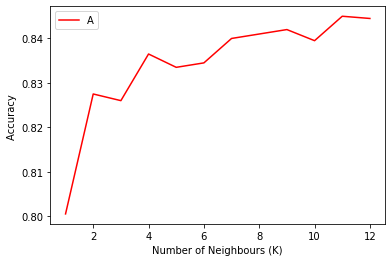

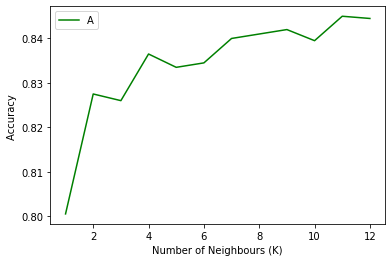

The best accuracy was with 0.845 with k= 11
The best jaccard accuracy was with 0.845 with k= 11


In [ ]:
k = int(input("Enter the max value of k = "))
p = k_model_acc(k) 
acc_show(k,p[0])
jacc_show(k,p[1])
print( "The best accuracy was with", p[0].max(), "with k=", p[0].argmax()+1)
print( "The best jaccard accuracy was with", p[1].max(), "with k=", p[1].argmax()+1)


In [ ]:
lst_clf_jacc.append(0.845)
lst_clf_name.append('K nearest neighnors k = 11')

From the above plot, we can evaluate that for k =11 we get the maximum out of sample accuracy.

> This implies that the clasifier is evaluating 11 nearest neighbours to predict the category that will a person will exit the services next month or not.



#  Support Vector Machine 

---





In [ ]:
from sklearn import svm
from sklearn.metrics import f1_score # f1 score card

We will be evaluating all the different kernels to find out the best fits:


In [ ]:
y_hat = np.zeros(len(Y_train))
ker = {1:'rbf',2:'linear',3:'poly', 4:'sigmoid'}
for i in range(1,5):
    clf = svm.SVC(kernel=ker[i] )
    model = clf.fit(X_train, Y_train)
    y_hat = model.predict(X_test)
    print("Jaccard Accuracy for ",ker[i],"is",jaccard_similarity_score(Y_test, y_hat))

Jaccard Accuracy for  rbf is 0.854
Jaccard Accuracy for  linear is 0.802
Jaccard Accuracy for  poly is 0.836
Jaccard Accuracy for  sigmoid is 0.686


In [ ]:
lst_clf_jacc.append(0.854)
lst_clf_name.append('SVM-rbf')

> The maximum accuracy is for kernel: 'rbf' - radial basis function -> 0.854




# Evaluation of all classifiers

In [ ]:
table = pd.DataFrame(lst_clf_jacc, index=[lst_clf_name[0],lst_clf_name[1],lst_clf_name[2],lst_clf_name[3]])
table.columns = ['Jaccard Score']
table.columns.name = 'Classifier Type'
table

Classifier Type,Jaccard Score
Logistic Regression,0.791
Random Forest,0.863
K nearest neighnors k = 11,0.845
SVM-rbf,0.854


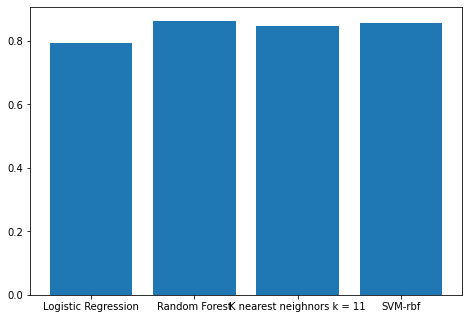

In [ ]:
#Bar plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = lst_clf_name
students = lst_clf_jacc
ax.bar(langs,students)
plt.show()

From the above table it is evident that for the given dataset the maximum out of sample accuracy is for **Random Forest Classifier.**

NOTE: This does not mean that other classifiers are not good, different classifiers work with different settings of parameters and hyper parameters, thus the classifiers accuracy depends upon the problem statment , the features, the type of attribute we want to get.
 